In [112]:
#IMPORTAMOS LAS LIBRERIAS QUE VAMOS A TRABAJAR
import pandas as pd #PANDAS ES PARA MANIPULAR LOS DATOS
import numpy as np  #NUMPY ES PARA HACER CALCULO ENTRE MATRICES
import matplotlib   #PARA GRAFICAR
import matplotlib.pyplot as plt 
from scipy import stats  #PARA SACAR LAS ESTADISTICAS, R2, PRUEBAS, ETC.
import seaborn as sns; sns.set() #PARA CREAR PLOTS
import warnings  #PARA CONTROLAR LAS ADVERTENCIAS
import itertools #ES PARA HACER FUNCIONES ITERABLES
warnings.filterwarnings ("ignore") 
plt.style.use ('dark_background') #en la siguiente linea se encontraran los estilos de las graficas que se pueden usar
import statsmodels.api as sm #CONTIENE LOS ALGORITMOS PARA SACAR LOS MODELOS DE FORECAST
matplotlib.rcParams ['axes.labelsize'] = 14 
matplotlib.rcParams ['xtick.labelsize'] = 12 #ESTAMOS DEFINIENDO LOS COLORES, LA DISTANCIA DEL TEXTO EN LOS GRAFICOS
matplotlib.rcParams ['ytick.labelsize'] = 12 
matplotlib.rcParams ['text.color'] = 'white'

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [43]:
df = pd.read_excel (r"C:\\Users\\Julian Umaña\\Downloads\\Ventas.xls") #IMPORTAMOS LOS DATOS A TRABAJAR
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max() #estamos definiendo las fechas a utilizar

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [44]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [45]:
#HASTA ACÁ LO QUE HEMOS HECHO ES CARGAR LOS DATOS, AHORA LO QUE HAREMOS ES PREPROCESAR LOS DATOS, Este paso incluye eliminar las columnas que no necesitamos, verificar los valores que faltan, agregar las ventas por fecha, etc.
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit'] #armamos una lista, contiene las etiquetas de las columnas
furniture.drop(cols, axis=1, inplace=True) #con .drop y .isnull estamos limpiando los datos
furniture = furniture.sort_values('Order Date') #estamos eliminando la columna de order date
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [46]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [47]:
furniture = furniture.set_index('Order Date')
furniture.index
#Indexamos nuestros datos a las series de tiempos

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [48]:
#como manejar tantas fechas puede ser enredado, utilizaremos las ventas promedio mensuales
y = furniture['Sales'].resample('MS').mean()

In [49]:
#vamos a vizualizar los datos, por ejemplo las ventas de 2016
y["2016":]

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

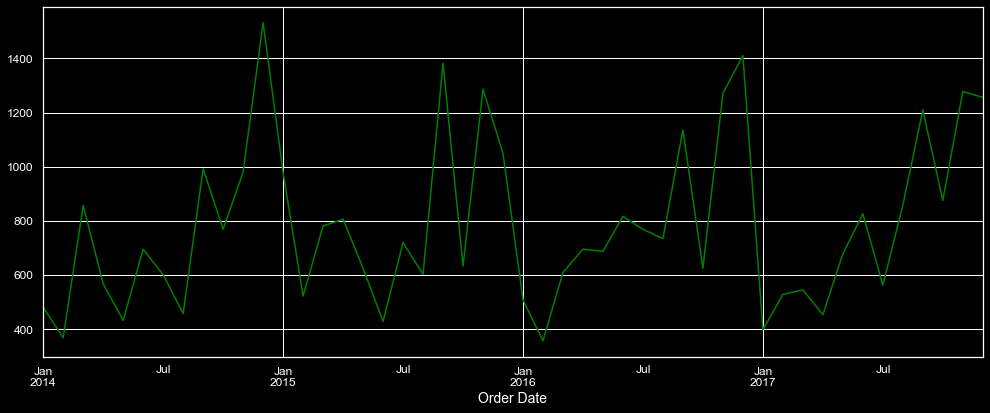

In [113]:
#vamos a ver los datos pero graficamente para entenderlos un poco mejor
y.plot (figsize = (15, 6), color="green") 
plt.show () #Como podemos ver en el grafico se presentan unas tendencias, ventas baas a los inicios de los años pero altas al final de los mismos, para ver esto mas claro vamos a armar un grafico de descomposicion para visualizar la serie de tiempo en sus tres componentes 1- tendencia, 2- estacionalidad y 3- ruido


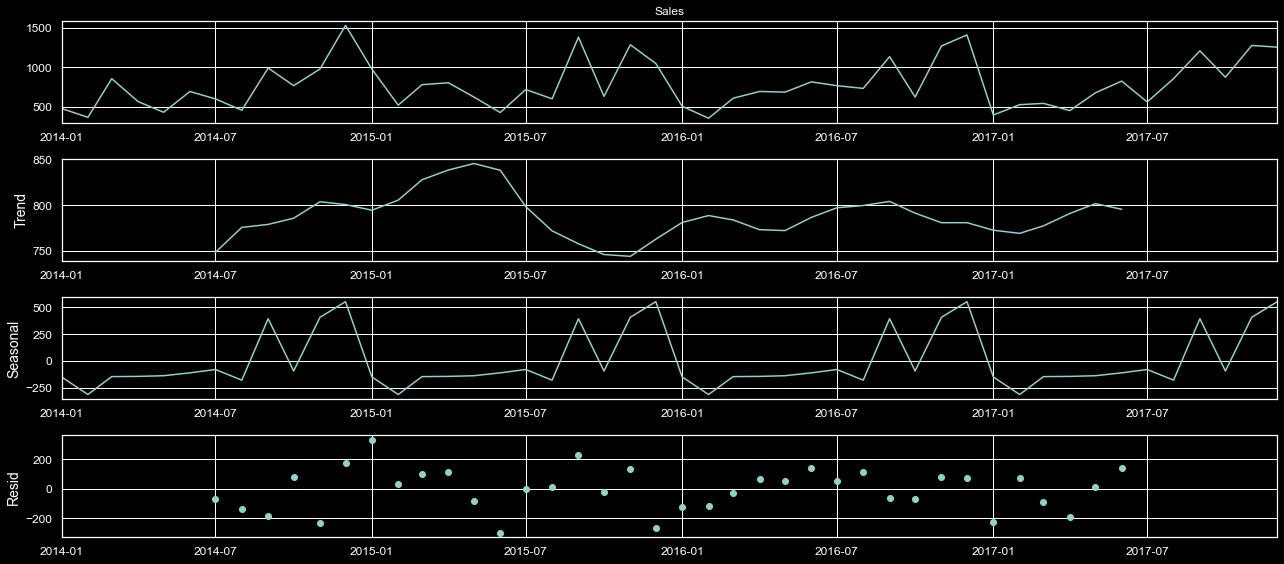

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot() #este es comando para crear el grafico
plt.show()

In [82]:
#Como podemos ver en el grafico anterior la venta de los muebles es inestable pero presenta una evidente estacionalidad, se venden pocos al inicio del año pero bastantes al final. Para tratar de predecir las ventas de muebles implementaremos un modelo ARIMA (p, d, q) [Autoregresivo integrado Media Movil] 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Ejemplos de combinaciones de parámetros para ARIMA de temporada ...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Ejemplos de combinaciones de parámetros para ARIMA de temporada ...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [90]:
#Bueno lo que haremos ahora es buscar el conjunto optimo de parametros que produzcan el mejor rendimiento de nuestro modelo
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:626.8786582729766
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202774
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899929833
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1347.4129956112124
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673694
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758129
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2904.2480897497494
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673025
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5621566660801
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:350579.5127012952
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876927771
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765311124
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:536.1030157507186
ARIMA

In [91]:
#para elegir la mejor combinacion buscaremos la que presente el AIC mas bajo, en este caso ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806231717308
#armaremos el modelo
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1]) #Estamos pidiendo que nos imprima la tabla de estadisticas

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   2003.161     -0.000      1.000   -3927.123    3925.123
ma.S.L12      -3.2476      1.625     -1.999      0.046      -6.432      -0.063
sigma2      2367.6449   4.74e+06      0.000      1.000   -9.29e+06     9.3e+06


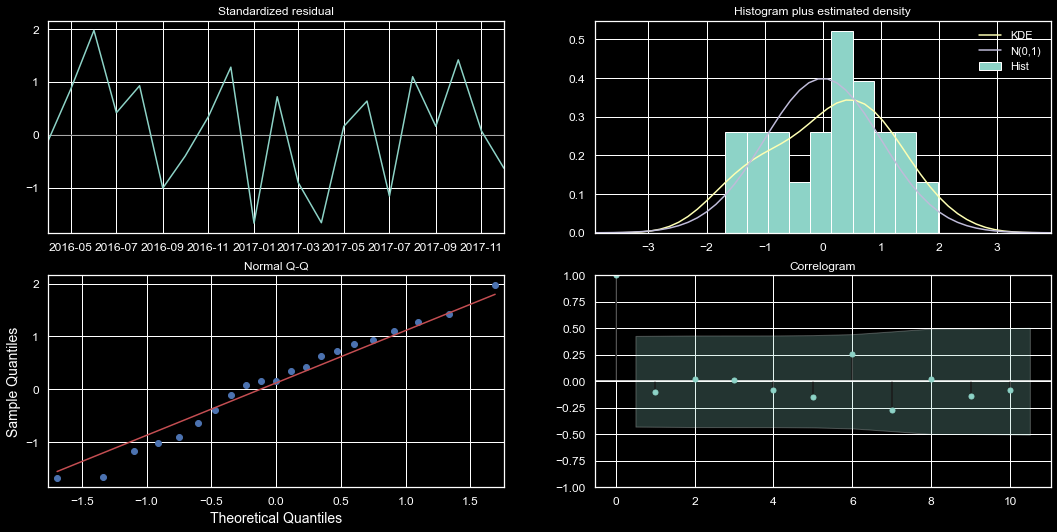

In [115]:
#Vamos a ver graficamente nuestro modelo para ver si hay anomalias
results.plot_diagnostics(figsize=(16, 8))
plt.show()

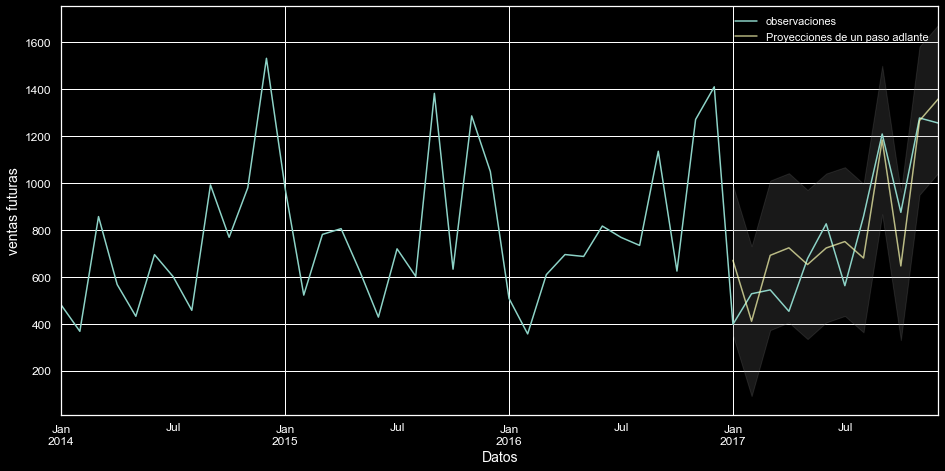

In [120]:
#El modelo no es perfecto y esta lejos de serlo, pero nos dice que nuestros errores estan distribuidos casi normal. Ahora lo que haremos es comparar la precision del modelo y luego programarlo para hacer las proyecciones.
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observaciones')
pred.predicted_mean.plot(ax=ax, label='Proyecciones de un paso adlante', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.2)
ax.set_xlabel('Datos')
ax.set_ylabel('ventas futuras')
plt.legend()
plt.show()

In [101]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('El error cuadrático medio de nuestros pronósticos es {}'.format(round(mse, 2)))

El error cuadrático medio de nuestros pronósticos es 27089.06


In [104]:
print('RMSE es {}'.format(round(np.sqrt(mse), 2)))
#nos dice que nuestro modelo fue capaz de predecir el promedio de ventas diarias de muebles en el conjunto de prueba dentro 164.59 de las ventas reales. Nuestras ventas diarias de muebles oscilan entre 400 y más de 1200. En mi opinión, este es un modelo bastante bueno hasta ahora.

RMSE es 164.59


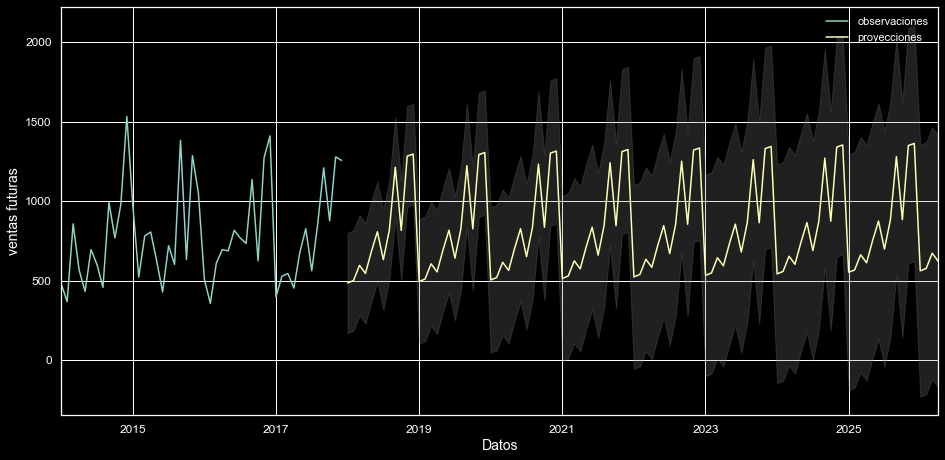

In [121]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observaciones', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='proyecciones')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='grey', alpha=.25)
ax.set_xlabel('Datos')
ax.set_ylabel('ventas futuras')
plt.legend()
plt.show()

In [107]:
#Como vemos en el grafico nuestro modelo logro replicar la estacionalidad, ahora bien como vimos que se vendieron mas articulos de oficina que muebles vamos a analizar los articulos de oficina (2121 muebles, 6026 articulos de oficina)
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [108]:
ols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


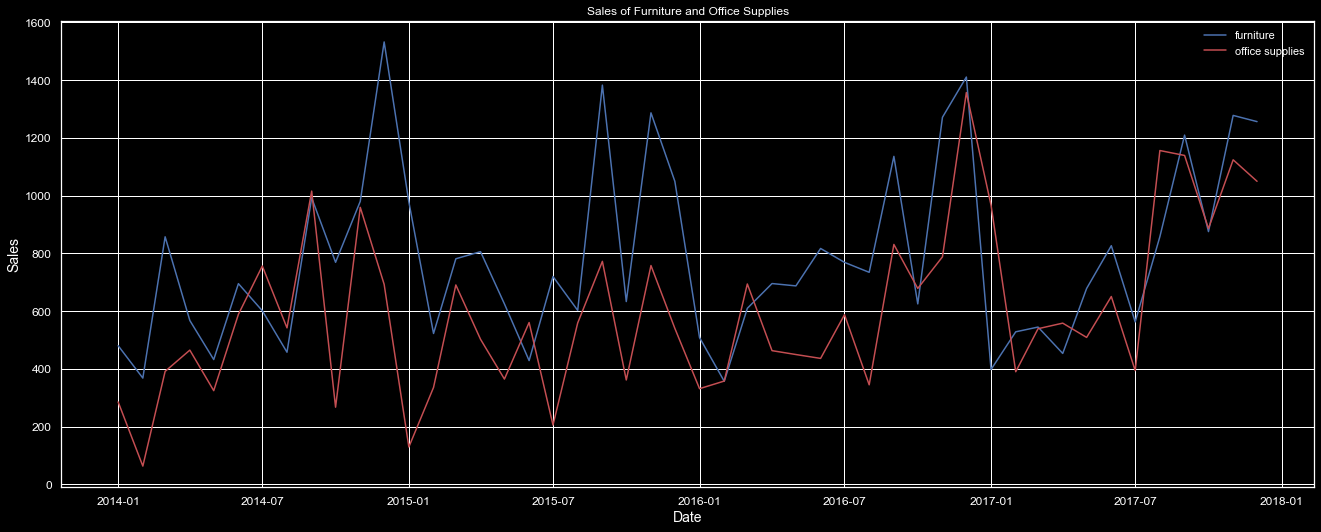

In [118]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend()